<a href="https://colab.research.google.com/github/ShreyaJaiswal1604/Arthritis_Image_Classification/blob/main/notebooks/01_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight


In [4]:
!git clone https://github.com/ShreyaJaiswal1604/Arthritis_Image_Classification

Cloning into 'Arthritis_Image_Classification'...
remote: Enumerating objects: 3879, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3879 (delta 0), reused 4 (delta 0), pack-reused 3874
Receiving objects: 100% (3879/3879), 100.62 MiB | 32.62 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [5]:
np.random.seed(12049)

In [25]:
def get_classes(data_path, classes, data):
    print(f"---- {data} ----")
    knee_severity = {}
    count = 0

    # for i in range(len(classes)):
    for i in classes:
        imgs = os.listdir(os.path.join(data_path, str(i)))
        knee_severity[i] = imgs
        count += len(imgs)

    # print(f"-------{knee_severity}")
    for k, v in knee_severity.items():
        print(
            # f"Grade {k} - {classes[k]}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"
            f"Grade {k} - {k}: {len(v)} images, {round((len(v) * 100) / count, 2)}%"

        )

    return knee_severity

In [32]:
def plot_classes(dict_classes, data_path, classes, data):
    for k, v in dict_classes.items():
        print(f"{data} - {k}")
        plt.figure(figsize=(10, 25))
        for i in range(5):
            img_path = os.path.join(data_path, str(k), v[i])
            img = tf.keras.preprocessing.image.load_img(img_path)
            plt.subplot(1, 5, 1 + i, xticks=[], yticks=[])
            plt.imshow(img)
            plt.title(f"Grade {k}")
        plt.show()

In [15]:
# Class names
class_names = ['healthy', 'severe']


In [16]:
# Define data directories
base_dir = "./Arthritis_Image_Classification/dataset/Original_Knee_Osteoarthritis_Dataset"
train_path = os.path.join(base_dir, 'train')
valid_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')

In [44]:
# Load data and visualize
train_data = get_classes(train_path, class_names, 'Train')
valid_data = get_classes(valid_path, class_names, 'Valid')
test_data = get_classes(test_path, class_names, 'Test')

---- Train ----
Grade healthy - healthy: 2286 images, 92.96%
Grade severe - severe: 173 images, 7.04%
---- Valid ----
Grade healthy - healthy: 328 images, 92.39%
Grade severe - severe: 27 images, 7.61%
---- Test ----
Grade healthy - healthy: 639 images, 92.61%
Grade severe - severe: 51 images, 7.39%


In [31]:
type(train_data)


dict

Train data - healthy


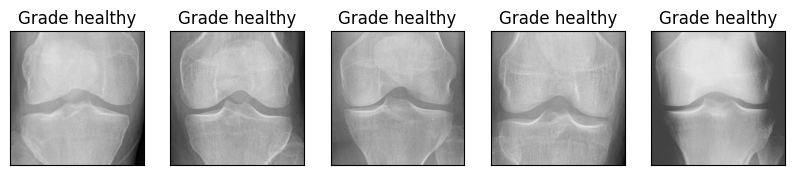

Train data - severe


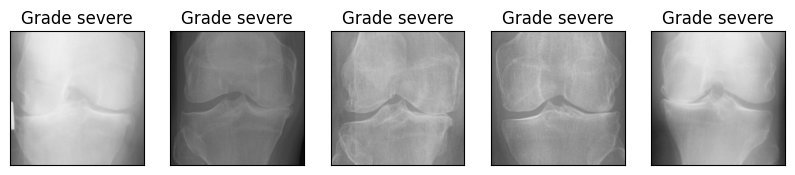

In [33]:
# Visualize data
# Train data
plot_classes(train_data, train_path, class_names, 'Train data')

Valid data - healthy


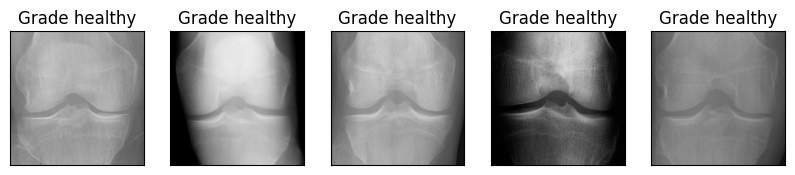

Valid data - severe


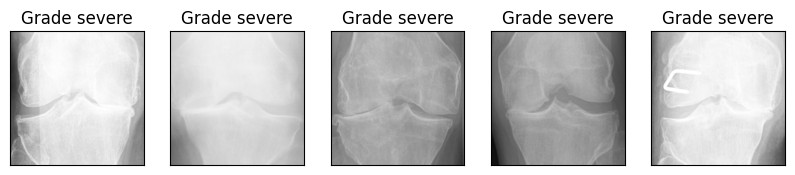

In [34]:
# Valid data
plot_classes(valid_data, valid_path, class_names, 'Valid data')


Test data - healthy


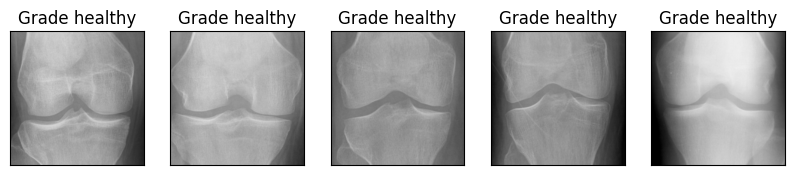

Test data - severe


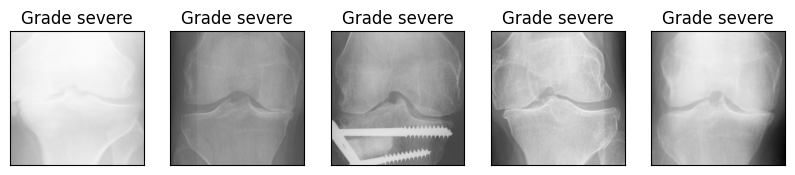

In [35]:
# Test data
plot_classes(test_data, test_path, class_names, 'Test data')

In [36]:
# Image Data Generator and Preprocess
aug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    horizontal_flip=True,
    brightness_range=[0.3, 0.8],
    width_shift_range=[-50, 0, 50, 30, -30],
    zoom_range=0.1,
    fill_mode="nearest",
)

In [37]:
noaug_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

In [38]:
target_size = (224, 224)

In [39]:
train_generator = aug_datagen.flow_from_directory(
    train_path, class_mode="binary", target_size=target_size, shuffle=True
)

Found 2459 images belonging to 2 classes.


In [40]:
valid_generator = noaug_datagen.flow_from_directory(
    valid_path,
    class_mode="binary",
    target_size=target_size,
    shuffle=False,
)

Found 355 images belonging to 2 classes.


In [49]:
# Compute class weights
y_train = train_generator.labels
class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)
train_class_weights = dict(enumerate(class_weights))

In [41]:
# Found images
print(f"Found {train_generator.samples} images belonging to {len(train_generator.class_indices)} classes.")
print(f"Found {valid_generator.samples} images belonging to {len(valid_generator.class_indices)} classes.")


Found 2459 images belonging to 2 classes.
Found 355 images belonging to 2 classes.


In [50]:
# Save class weights
np.save('class_weights.npy', train_class_weights)

In [42]:
# y_train = train_generator.labels
# y_val = valid_generator.labels

In [43]:
# # Class weight
# unique, counts = np.unique(y_train, return_counts=True)
# print("Train ---> ", dict(zip(unique, counts)))

# class_weights = compute_class_weight(
#     class_weight="balanced", classes=np.unique(y_train), y=y_train
# )
# train_class_weights = dict(enumerate(class_weights))
# print(train_class_weights)

Train --->  {0: 2286, 1: 173}
{0: 0.5378390201224846, 1: 7.106936416184971}
